### Running logistic regression on real life customer churn data

In [29]:
import kagglehub
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#The code below was used to download the dataset which was then moved to Customer Churn forlder.
# I also downloaded rainbow csv that made the visualization of csv a lot better


# path = kagglehub.dataset_download("blastchar/telco-customer-churn")
# print("Path to dataset files:", path)


In [4]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
# The code below prints how many entries in each column are null. If none of them are null, we can move on.
print(data.isnull().sum())

#The code below shows how many times an entry appears in a column. 
print(data['gender'].value_counts(normalize=True))

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64


In [7]:
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [8]:
new_data = data.drop(columns="customerID", axis=1, inplace=False)

In [16]:
#One hot encoding

dataOHE = pd.get_dummies(new_data,drop_first=True,dtype=int)

In [21]:
#label enocding

from sklearn.preprocessing import LabelEncoder

data_LE = data.copy()
categorical_cols = data.select_dtypes(include=['object']).columns  # Categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    data_LE[col] = label_encoder.fit_transform(data_LE[col])

In [25]:
dataOHE

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,72,103.20,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [64]:
from sklearn.model_selection import train_test_split
X_train_OHE, X_test_OHE, y_train_OHE, y_test_OHE = train_test_split(dataOHE.drop(columns='Churn_Yes'), dataOHE['Churn_Yes'], test_size=0.2, random_state=42)
X_train_LE, X_test_LE, y_train_LE, y_test_LE = train_test_split(data_LE.drop(columns='Churn'), data_LE['Churn'], test_size=0.2, random_state=42)

In [98]:
#Normalizing the data to prevent overflowing if w gets too large:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_OHE = scaler.fit_transform(X_train_OHE)
X_test_OHE = scaler.fit_transform(X_test_OHE)
X_train_LE = scaler.fit_transform(X_train_LE)
X_test_LE = scaler.fit_transform(X_test_LE)


In [84]:
#Logistic Regression

def sigmoid(z):
       return 1/(1 + np.exp(-z))


class LogisticRegression:
 
       def __init__(self, num_features):
               # Initialize weights and bias to zeros
              self.w = np.zeros(num_features)
              self.b = 0

       def predict_proba(self, X):
              y_pred = np.dot(X,self.w) + self.b
              return(sigmoid(y_pred))
       
       def predict(self,X):
              pred = self.predict_proba(X)
              return [1 if p>=0.5 else 0 for p in pred]
       

       def Loss(self, X,gt,epsilon):
              y_hat = np.clip(self.predict_proba(X),epsilon,1-epsilon)
              return -np.mean(gt*np.log(y_hat) + (1-gt)*np.log(1-y_hat))
    
       def updateweights(self, X, gt, y_hat, alpha):
              self.w = self.w - alpha * 1/len(y_hat) * np.dot(X.T,y_hat-gt)
              self.b = self.b -  alpha * np.mean(y_hat - gt)

       def evaluate(self,X,gt):
              y_pred = self.predict(X)
              return np.mean(y_pred==gt)*100


In [85]:
X_train_OHE.shape[1]

6559

In [103]:
def runmodel(num_features,X,y):
# Initialize the model for 2 features
    model = LogisticRegression(num_features=num_features)
    L = []

    for i in range(50):
        y_pred = model.predict_proba(X)
        Loss =  model.Loss(X,y,epsilon = 1e-15)
        L.append(Loss)
        model.updateweights(X,y,y_pred,1)

    accuracy = model.evaluate(X,y)
    loss = model.Loss(X,y,epsilon=1e-15)
    L.append(loss)
    print("Model acuracy on training data is {acc:.2f}%".format(acc=accuracy))
    plt.plot(L)



Model acuracy on training data is 98.83%


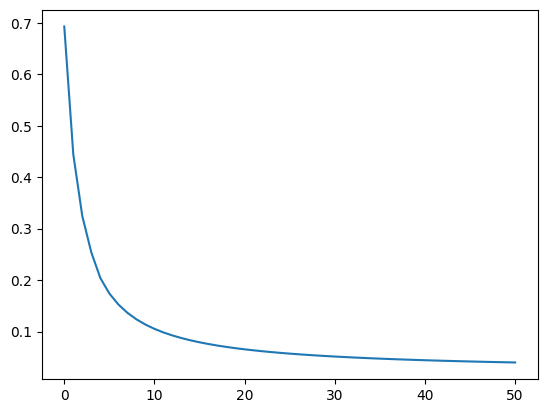

In [104]:
runmodel(num_features=X_train_OHE.shape[1],X=X_train_OHE,y=y_train_OHE)

Model acuracy on training data is 99.72%


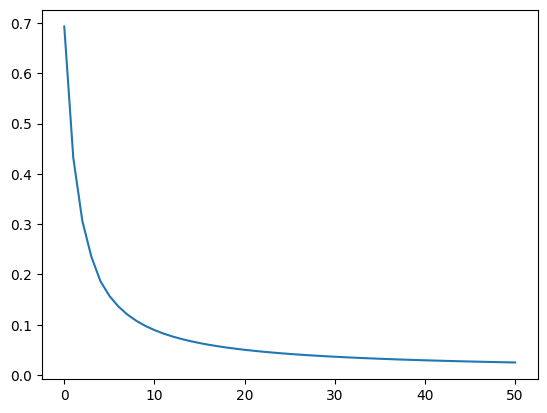

In [105]:
runmodel(num_features=X_test_OHE.shape[1],X=X_test_OHE,y=y_test_OHE)

Model acuracy on training data is 80.12%


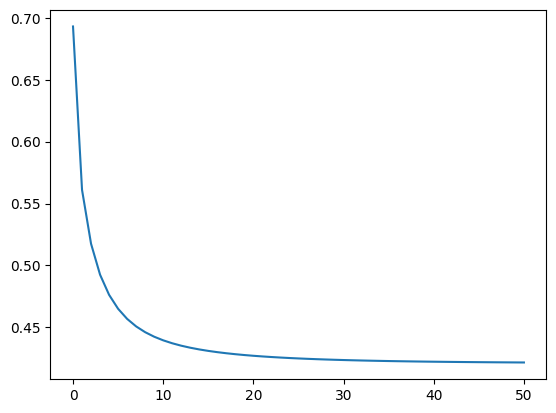

In [106]:
runmodel(num_features=X_train_LE.shape[1],X=X_train_LE,y=y_train_LE)

Model acuracy on training data is 81.90%


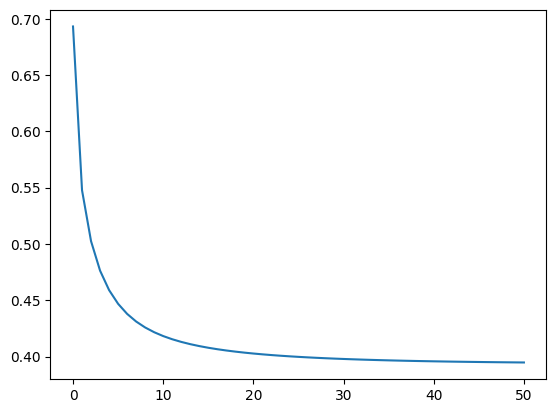

In [107]:
runmodel(num_features=X_test_LE.shape[1],X=X_test_LE,y=y_test_LE)